<a href="https://colab.research.google.com/github/simplepablo/repo/blob/main/CSDA2010_GROUP_C_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# THIS IS OUR <span style="color:red;"> CSDA2010 GROUP C </span>  NOTEBOOK

## For our Project #1 - Market Basket Analysis

**References include:- Example from course notes**

 *We use listing-level data of Airbnb properties that were available on the platform from January to
December 2012. The data was acquired from InsideAirbnb.com, an independent service that provides
data on several cities. Our data consists of London rentals. For each listing, we have data on its price,
days available, number of ratings as well as the text description of the property. We also have data for
each review, including the reviewer, the listing, the review score, and the text of the review. We merged
this data with other social and demographic measures obtained from gov.uk, including quality of
nearby school ratings and local crime rates. See Appendix Table 1 for a list and description of variables
used in our analysis.
We performed some transformation of variables to account for missing and skewed data. First, we
use the natural log of price and number of ratings. Some observations had missing crime data. For
those observations, we substituted the mean crime rate of the neighboring regions.
After dropping 1,425 observations because of missing or erroneous location information, we have
42,195 listings that were used in our analysis. Table 1 presents summary statistics for the variables and
Table 2 presents a correlation matrix. The mean price of a listing in our dataset is 5.05 log pounds and
the mean number of ratings (logged) is 1.56.*.

We can colaborate in this notebook.

# SET UP

In [ ]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


## Import Data from Google Sheets

In [ ]:
# Install the latest version of pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 137 kB/s
     |████████████████████████████████| 596 kB 4.6 MB/s 
     |████████████████████████████████| 102 kB 8.3 MB/s 
     |████████████████████████████████| 690 kB 6.2 MB/s 
     |████████████████████████████████| 4.7 MB 29.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 47.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=63971f34d34915aa4a2bbdc9c5914768e07e0b2f93197bbb09db3dca4104aba9
  Stored in directory: /tmp/pip-ephem-wheel-cache-3fzmjf9o/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=397d1f8a1c37547a914ca089f45239c82eb42d228f193d785729d593930794c5
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3

## Load required libraries

In [ ]:
# Import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import scipy.stats as st
from mlxtend.frequent_patterns import apriori, association_rules


# From sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# additional libraries to analyze text
from IPython.display import display
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.plotting import figure, output_file, show
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import linear_kernel
from textblob import TextBlob
from tqdm import tqdm
import ast
import matplotlib.mlab as mlab
import nltk
import numpy as np
import re
import scipy.stats as stats
from scipy.sparse import csr_matrix, csc_matrix
from scipy import sparse
import seaborn as sb
import spacy
import string
output_notebook()
pd.options.mode.chained_assignment = None

In [ ]:
!pip install -q streamlit

In [ ]:
!wget https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py

--2022-07-27 23:07:10--  https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-07-27 23:07:11 ERROR 404: Not Found.



In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-07-27 23:18:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  59.1MB/s    in 0.2s    

2022-07-27 23:18:48 (59.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://35fb-35-196-22-199.ngrok.io


In [ ]:
!streamlit run /content/iris-ml-app.py

2022-07-27 23:20:29.691 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: /content/iris-ml-app.py


## Load Dataset


For our study, we used a dataset from Kaggle -----------.
This dataset consists of -------------------------------.

File is located on Google Drive here → 
https://drive.google.com/file/d/1ZmcgqcQZh_t9Sfiy8DkG9kAsZzRCP1Gj/view?usp=sharing



### Source:
https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis


Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


### Data Set Information:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 

### Attribute Information:
* BillNo: 6-digit number assigned to each transaction. Nominal.
* Itemname: Product name. Nominal.
* Quantity: The quantities of each product per transaction. Numeric.
* Date: The day and time when each transaction was generated. Numeric.
* Price: Product price. Numeric.
* CustomerID: 5-digit number assigned to each customer. Nominal.
* Country: Name of the country where each customer resides. Nominal.
* Total_Price: Transaction total. Numeric.

**NOTE - To load the dataset. Run code below**

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1ZmcgqcQZh_t9Sfiy8DkG9kAsZzRCP1Gj'
downloaded = drive.CreateFile({'id': file_id})
# 
downloaded.GetContentFile('file.csv')


In [ ]:
mbadf = pd.read_csv('file.csv', delimiter=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Review the Data

In [ ]:
mbadf.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# To find out what sort of detail is provided with this dataset, we can call .keys()
mbadf.keys()


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [ ]:
# What info are included in the dataset
mbadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# convert Date column into correct datatype
mbadf.Date = pd.to_datetime(mbadf.Date)
mbadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  object        
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
mbadf.shape

(522064, 7)

In [ ]:
mbadf.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


## For each numerical feature, we can see the **`count`**, or number of data entries, the **`mean`** value, and the **`standard deviation`**, **`min`**, **`max`** and **`quartile`** values. 




In [ ]:
# check for blank or missing values
mbadf.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
# drop NA values
mbadf.dropna(inplace=True)

# quantity and price should be greater than 0
mbadf = mbadf[mbadf['Quantity'] > 0]

# change the price column datatype as a numeric
mbadf['Price'] = pd.to_numeric(mbadf['Price'], errors='coerce')
mbadf = mbadf[mbadf['Price'] > 0]

In [ ]:
mbadf.shape

(1537, 7)

In [ ]:
mbadf.isna().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [ ]:
mbadf.dtypes

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

# EDA & VISUALIZATIONS

## Should we try adding some visualizations? 
**Perhaps a bar chart of the top 10-15 most popular items?**

In [ ]:
mbadf['Itemname'].value_counts().head(15)

POSTAGE                               1034
Next Day Carriage                       79
BOTANICAL GARDENS WALL CLOCK            63
Manual                                  46
LOVE SEAT ANTIQUE WHITE METAL           40
VINTAGE RED KITCHEN CABINET             36
CARRIAGE                                32
RUSTIC  SEVENTEEN DRAWER SIDEBOARD      23
VINTAGE BLUE KITCHEN CABINET            18
CHEST NATURAL WOOD 20 DRAWERS           13
RED KUKUI COCONUT SEED NECKLACE         11
Bank Charges                            11
SCHOOL DESK AND CHAIR                   10
REGENCY MIRROR WITH SHUTTERS             7
BROWN KUKUI COCONUT SEED NECKLACE        6
Name: Itemname, dtype: int64

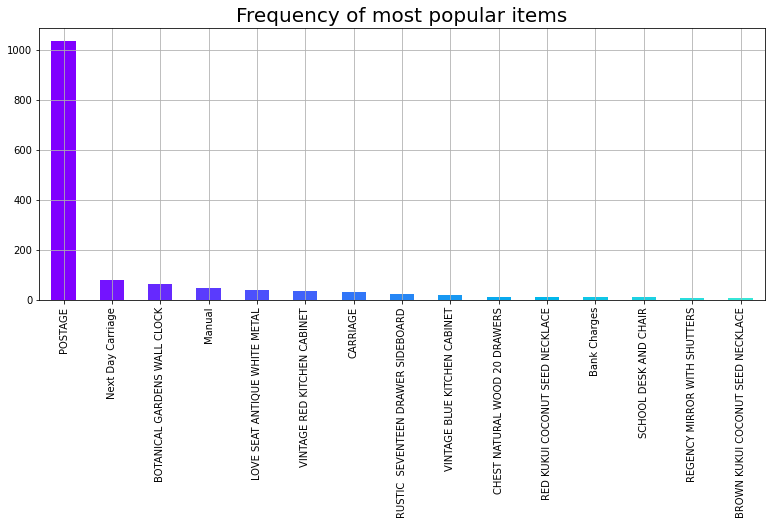

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
mbadf['Itemname'].value_counts().head(15).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()


**"POSTAGE"** seems to be an outlier. We will drop the rows that have the "POSTAGE" item.

In [ ]:
mbadf.drop(mbadf[mbadf.Itemname=='POSTAGE'].index, inplace=True)

In [ ]:
mbadf['Itemname'].value_counts().head(15)

Next Day Carriage                      79
BOTANICAL GARDENS WALL CLOCK           63
Manual                                 46
LOVE SEAT ANTIQUE WHITE METAL          40
VINTAGE RED KITCHEN CABINET            36
CARRIAGE                               32
RUSTIC  SEVENTEEN DRAWER SIDEBOARD     23
VINTAGE BLUE KITCHEN CABINET           18
CHEST NATURAL WOOD 20 DRAWERS          13
RED KUKUI COCONUT SEED NECKLACE        11
Bank Charges                           11
SCHOOL DESK AND CHAIR                  10
REGENCY MIRROR WITH SHUTTERS            7
BROWN KUKUI COCONUT SEED NECKLACE       6
SPOTTED WHITE NATURAL SEED NECKLACE     5
Name: Itemname, dtype: int64

In [ ]:
mbadf['Itemname'].value_counts()

Next Day Carriage                      79
BOTANICAL GARDENS WALL CLOCK           63
Manual                                 46
LOVE SEAT ANTIQUE WHITE METAL          40
VINTAGE RED KITCHEN CABINET            36
                                       ..
DOORMAT VINTAGE LEAF                    1
FRENCH STYLE EMBOSSED HEART CABINET     1
PICNIC BASKET WICKER SMALL              1
BREAD BIN DINER STYLE RED               1
CLASSIC FRENCH STYLE BASKET NATURAL     1
Name: Itemname, Length: 72, dtype: int64

In [ ]:
mbadf.shape

(503, 7)

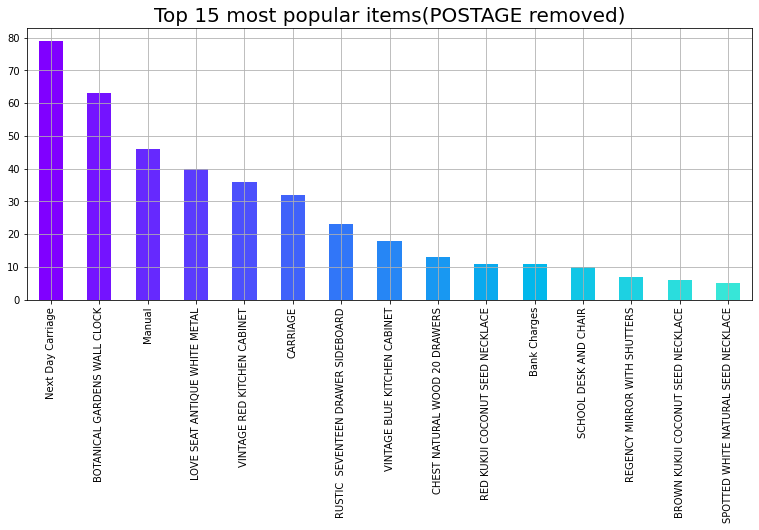

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
mbadf['Itemname'].value_counts().head(15).plot.bar(color = color, figsize=(13,5))
plt.title('Top 15 most popular items(POSTAGE removed)', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
sales = mbadf
sales['Total_Price'] = sales['Price'] * sales['Quantity']
# sales.columns
sales_per_customer = sales.groupby(['CustomerID', 'Country']).agg({"Total_Price": "sum"})
sales_per_customer.head(10)

,,Total_Price
CustomerID,Country,
12357.0,Switzerland,25.0
12432.0,Norway,130.0
12448.0,Spain,65.0
12471.0,Germany,30.0
12493.0,France,36.0
12500.0,Germany,3.0
12523.0,France,25.0
12612.0,Germany,96.0
12620.0,France,18.0


In [ ]:
sales_per_Itemname = sales.groupby(['Itemname', 'Country']).agg({"Total_Price": "sum"})
sales_per_Itemname.head(10)
sales_per_Itemname.sort_values("Total_Price", ascending=False)

,,Total_Price
Itemname,Country,
VINTAGE RED KITCHEN CABINET,United Kingdom,7625.0
LOVE SEAT ANTIQUE WHITE METAL,United Kingdom,5870.0
Manual,United Kingdom,5064.0
RUSTIC SEVENTEEN DRAWER SIDEBOARD,United Kingdom,4670.0
VINTAGE BLUE KITCHEN CABINET,United Kingdom,3435.0
...,...,...
CAKE STAND VICTORIAN FILIGREE MED,United Kingdom,3.0
PICNIC BASKET WICKER LARGE,United Kingdom,3.0
High Resolution Image,Germany,3.0


** Filter out the Credit/Cancellation transactions. (BillNo starting with **C**)

** Consider filter by one country's transactions only.

# PREPROCESSING

Process our data to make it suitable for the algorithm.

###Do we need to do any further cleaning of the dataset.
* *Remove the rows that have cancelled transactions BillNo that start with letter 'c' indicates a cancellation **

## Parse the items in each Basketgroup by Bill Number and encode values.

# Invoice Product Matrix (Basket sets)



In [ ]:
df_invoice_product_matrix = mbadf.groupby(['BillNo', 'Itemname']) \
  ['Quantity'].sum().unstack().fillna(0). \
  applymap(lambda x: 1 if x > 0 else 0)

df_invoice_product_matrix.head(10)



Itemname,BEADED CHANDELIER T-LIGHT HOLDER,BILI NUT AND WOOD NECKLACE,BLING KEY RING STAND,BOTANICAL GARDENS WALL CLOCK,BREAD BIN DINER STYLE PINK,BREAD BIN DINER STYLE RED,BROWN CHECK CAT DOORSTOP,BROWN KUKUI COCONUT SEED NECKLACE,Bank Charges,CAKE STAND VICTORIAN FILIGREE MED,...,SMALL WHITE RETROSPOT MUG IN BOX,SPOTTED WHITE NATURAL SEED NECKLACE,TWO DOOR CURIO CABINET,UTILTY CABINET WITH HOOKS,VANILLA SCENT CANDLE JEWELLED BOX,VICTORIAN SEWING BOX SMALL,VINTAGE BLUE KITCHEN CABINET,VINTAGE RED KITCHEN CABINET,VINTAGE WOODEN BAR STOOL,WOODEN ADVENT CALENDAR CREAM
BillNo,,,,,,,,,,,,,,,,,,,,,
536392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536779,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
537225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ASSOCIATION RULES LEARNING

We should consider setting the minimum support to **0.001%**.

In [ ]:
frequent_itemsets = apriori(df_invoice_product_matrix, min_support=0.001, max_len=2, use_colnames=True) 
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
44,0.189904,(Next Day Carriage)
3,0.151442,(BOTANICAL GARDENS WALL CLOCK)
43,0.108173,(Manual)
39,0.096154,(LOVE SEAT ANTIQUE WHITE METAL)
69,0.086538,(VINTAGE RED KITCHEN CABINET)
...,...,...
112,0.002404,"(DOORMAT FAIRY CAKE, DOORMAT UNION JACK GUNS A..."
30,0.002404,(DOORMAT VINTAGE LEAF)
31,0.002404,(DOORMAT WELCOME PUPPIES)
33,0.002404,(FRENCH STYLE EMBOSSED HEART CABINET)


In [ ]:
frequent_itemsets.shape

(203, 2)

From the results above, we have 1077 frequent item combinations

## Generate the Rules for Support, Confidence and Lift
* The **support** metric measures the share of transactions that contain an itemset.
* **Confidence** and **Lift** when suport is misleading.

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.001)
rules.sort_values("support", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
261,(VINTAGE BLUE KITCHEN CABINET),(VINTAGE RED KITCHEN CABINET),0.043269,0.086538,0.024038,0.555556,6.419753,0.020294,2.055288
260,(VINTAGE RED KITCHEN CABINET),(VINTAGE BLUE KITCHEN CABINET),0.086538,0.043269,0.024038,0.277778,6.419753,0.020294,1.324704
24,(SPOTTED WHITE NATURAL SEED NECKLACE),(BROWN KUKUI COCONUT SEED NECKLACE),0.012019,0.014423,0.009615,0.800000,55.466667,0.009442,4.927885
22,(BROWN KUKUI COCONUT SEED NECKLACE),(RED KUKUI COCONUT SEED NECKLACE),0.014423,0.026442,0.009615,0.666667,25.212121,0.009234,2.920673
25,(BROWN KUKUI COCONUT SEED NECKLACE),(SPOTTED WHITE NATURAL SEED NECKLACE),0.014423,0.012019,0.009615,0.666667,55.466667,0.009442,2.963942
17,(RED KUKUI COCONUT SEED NECKLACE),(BILI NUT AND WOOD NECKLACE),0.026442,0.009615,0.009615,0.363636,37.818182,0.009361,1.556319
16,(BILI NUT AND WOOD NECKLACE),(RED KUKUI COCONUT SEED NECKLACE),0.009615,0.026442,0.009615,1.000000,37.818182,0.009361,inf
15,(BILI NUT AND WOOD NECKLACE),(BROWN KUKUI COCONUT SEED NECKLACE),0.009615,0.014423,0.009615,1.000000,69.333333,0.009477,inf
14,(BROWN KUKUI COCONUT SEED NECKLACE),(BILI NUT AND WOOD NECKLACE),0.014423,0.009615,0.009615,0.666667,69.333333,0.009477,2.971154
23,(RED KUKUI COCONUT SEED NECKLACE),(BROWN KUKUI COCONUT SEED NECKLACE),0.026442,0.014423,0.009615,0.363636,25.212121,0.009234,1.548764


In [ ]:
rules.shape

(262, 9)

### Get rules from Apriori with confidence of 10%.

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules.sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(FLOWERS CHANDELIER T-LIGHT HOLDER),(BEADED CHANDELIER T-LIGHT HOLDER),0.007212,0.007212,0.007212,1.0,138.666667,0.007160,inf
131,(DOORMAT KEEP CALM AND COME IN),(DOORMAT VINTAGE LEAF),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf
121,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT RESPECTABLE HOUSE),0.002404,0.007212,0.002404,1.0,138.666667,0.002387,inf
1,(BEADED CHANDELIER T-LIGHT HOLDER),(FLOWERS CHANDELIER T-LIGHT HOLDER),0.007212,0.007212,0.007212,1.0,138.666667,0.007160,inf
125,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT UNION FLAG),0.002404,0.007212,0.002404,1.0,138.666667,0.002387,inf
126,(DOORMAT UNION JACK GUNS AND ROSES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf
127,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT UNION JACK GUNS AND ROSES),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf
128,(DOORMAT WELCOME PUPPIES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf
129,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT WELCOME PUPPIES),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf
130,(DOORMAT VINTAGE LEAF),(DOORMAT KEEP CALM AND COME IN),0.002404,0.002404,0.002404,1.0,416.000000,0.002398,inf


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=400)
rules.sort_values("lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOORMAT UNION JACK GUNS AND ROSES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
1,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT UNION JACK GUNS AND ROSES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
2,(DOORMAT WELCOME PUPPIES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
3,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT WELCOME PUPPIES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
4,(DOORMAT VINTAGE LEAF),(DOORMAT KEEP CALM AND COME IN),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
5,(DOORMAT KEEP CALM AND COME IN),(DOORMAT VINTAGE LEAF),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
6,(DOORMAT WELCOME PUPPIES),(DOORMAT UNION JACK GUNS AND ROSES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
7,(DOORMAT UNION JACK GUNS AND ROSES),(DOORMAT WELCOME PUPPIES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
8,(HAND OPEN SHAPE GOLD),(HAND OPEN SHAPE DECO.WHITE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
9,(HAND OPEN SHAPE DECO.WHITE),(HAND OPEN SHAPE GOLD),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf


In [ ]:
rules.shape

(10, 9)

##	Lift provides another metric for evaluating the relationship between items.
**Numerator:** Proportion of transactions that contain Xx and Yy.

**Denominator:** Proportion if Xx and Yy are assigned randomly and independently to transactions.


In [ ]:
sorted_rules = rules.sort_values("lift", ascending=False)
rules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOORMAT UNION JACK GUNS AND ROSES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
1,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT UNION JACK GUNS AND ROSES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
2,(DOORMAT WELCOME PUPPIES),(DOORMAT HOME SWEET HOME BLUE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
3,(DOORMAT HOME SWEET HOME BLUE),(DOORMAT WELCOME PUPPIES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
4,(DOORMAT VINTAGE LEAF),(DOORMAT KEEP CALM AND COME IN),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
5,(DOORMAT KEEP CALM AND COME IN),(DOORMAT VINTAGE LEAF),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
6,(DOORMAT WELCOME PUPPIES),(DOORMAT UNION JACK GUNS AND ROSES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
7,(DOORMAT UNION JACK GUNS AND ROSES),(DOORMAT WELCOME PUPPIES),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
8,(HAND OPEN SHAPE GOLD),(HAND OPEN SHAPE DECO.WHITE),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf
9,(HAND OPEN SHAPE DECO.WHITE),(HAND OPEN SHAPE GOLD),0.002404,0.002404,0.002404,1.0,416.0,0.002398,inf


In [ ]:
rules.shape

(10, 9)

### What pair of items are frequently bought together?
DOOR MAT UNION JACK GUNS AND ROSES and DOORMAT HOME SWEET HOME BLUE

### What recommendations should we suggest for pricing and promotion items?

### We can build a recommendation engine to recomend DOOR MAT UNION JACK GUNS AND ROSES to customers who purchase DOORMAT HOME SWEET HOME BLUE (first rule).

In [ ]:
recommendation_list = []

for i, product in sorted_rules['antecedents'].items():
    for j in list(product):
        if j == ('DOORMAT HOME SWEET HOME BLUE'):
            recommendation_list.append(list(sorted_rules.iloc[i]['consequents']))

In [ ]:
recommendation_list

[['DOORMAT UNION JACK GUNS AND ROSES'], ['DOORMAT WELCOME PUPPIES']]